##Lede Program
##Data and Databases Lecture 7
##Number munging:  Pandas, vectors, querying

Get this file at:


http://columbia.edu/~mj340/pandas-skeleton.ipynb
    


In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

### our data is currently at my website:

http://columbia.edu/~mj340/HMXPC_13.zip
    
put into a working directory that makes sense for you



#Our ritual: Exploratory data analysis


> Exploratory data analysis (EDA) seeks to reveal structure, or simple descriptions, in data. We look at numbers and graphs and try to find patterns.  
    - Persi Diaconis, "Theories of Data Analysis: From Magical Thinking Through Classical statistics"

> . . . proceeding via a ‘dustbowl’ empiricism is dangerous at worst and foolish at best . . . . The purely empirical approach is particularly dangerous in an age when computers and packaged programs are readily available, since there is temptation to substitute immediate empirical analysis for more analytic thought and theory building.
    - Einhorn, “Alchemy in the Behavioral Sciences,” 1972

>. . . we can view the techniques of EDA as a ritual designed to reveal patters in a data set. Thus, we may believe that naturally occurring data sets contain structure, that EDA is a useful vehicle for revealing the structure. . . . If we make no attempt to check whether the structure could have arisen by chance, and tend to accept the findinds as gospel, then the ritual comes close to magical thinking. ... a controlled form of magical thinking--in the guise of 'working hypothesis'--is a basic ingredient of scientific progress. 
    - Persi Diaconis, "Theories of Data Analysis: From Magical Thinking Through Classical statistics"

#From data to databases to data mining
- move from accessing and manipulating data to performing ever more complicated *queries* on our data


#`Pandas` first-line `python` tool for EDA
- rich data structures
- powerful ways to slice, dice, reformate, fix, and eliminate data
    - taste of what can do
- tables like Excel or a spreadsheet
- rich queries like databases
- manipulation on vectors and matrices directly
    - human friedly interface to numpy


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv ("HMXPC_13.csv",sep = ',')

In [4]:
df

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9,NaN,NaN,0,NaN,1
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaN,NaN,9,NaN,1,0,NaN,1
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16,NaN,NaN,0,NaN,1
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaN,NaN,16,NaN,NaN,0,NaN,1
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaN,NaN,16,NaN,NaN,0,NaN,1
5,HarvardX/PH207x/2012_Fall,MHxPC130275857,1,1,1,0,United States,NaN,NaN,NaN,0,2012-09-17,2013-05-23,502,16,50,12,0,NaN,NaN
6,HarvardX/PH278x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,NaN,NaN,16,NaN,NaN,0,NaN,1
7,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,France,NaN,NaN,NaN,0,2013-01-01,2013-05-14,42,6,NaN,3,0,NaN,NaN
8,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0,2013-02-18,2013-03-17,70,3,NaN,3,0,NaN,NaN
9,HarvardX/CS50x/2012,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-20,NaN,NaN,12,NaN,3,0,NaN,1


In [5]:
df.shape

(641138, 20)

In [6]:
df["course_id"]

0      HarvardX/CB22x/2013_Spring
1             HarvardX/CS50x/2012
2      HarvardX/CB22x/2013_Spring
3             HarvardX/CS50x/2012
4      HarvardX/ER22x/2013_Spring
5       HarvardX/PH207x/2012_Fall
6     HarvardX/PH278x/2013_Spring
7      HarvardX/CB22x/2013_Spring
8      HarvardX/CB22x/2013_Spring
9             HarvardX/CS50x/2012
10     HarvardX/ER22x/2013_Spring
11     HarvardX/ER22x/2013_Spring
12     HarvardX/CB22x/2013_Spring
13            HarvardX/CS50x/2012
14     HarvardX/ER22x/2013_Spring
...
641123     MITx/6.00x/2013_Spring
641124     MITx/6.00x/2013_Spring
641125    MITx/6.002x/2013_Spring
641126     MITx/6.00x/2013_Spring
641127    MITx/6.002x/2013_Spring
641128    MITx/14.73x/2013_Spring
641129     MITx/6.00x/2013_Spring
641130    MITx/14.73x/2013_Spring
641131     MITx/8.02x/2013_Spring
641132    MITx/6.002x/2013_Spring
641133     MITx/6.00x/2013_Spring
641134     MITx/6.00x/2013_Spring
641135    MITx/6.002x/2013_Spring
641136     MITx/6.00x/2013_Spring
641137    

In [7]:
df["course_id"][3000:3005]

3000            HarvardX/CS50x/2012
3001      HarvardX/PH207x/2012_Fall
3002    HarvardX/PH278x/2013_Spring
3003            HarvardX/CS50x/2012
3004            HarvardX/CS50x/2012
Name: course_id, dtype: object

In [8]:
df[3000:3005]

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
3000,HarvardX/CS50x/2012,MHxPC130344411,1,0,0,0,United States,NaN,NaN,NaN,0,2012-08-16,NaN,NaN,12,NaN,NaN,0,NaN,1
3001,HarvardX/PH207x/2012_Fall,MHxPC130344411,1,1,0,0,United States,NaN,NaN,NaN,0,2012-08-16,2013-03-21,239,12,100,4,0,NaN,NaN
3002,HarvardX/PH278x/2013_Spring,MHxPC130344411,1,0,0,0,United States,NaN,NaN,NaN,0,2013-03-21,NaN,NaN,12,NaN,NaN,0,NaN,1
3003,HarvardX/CS50x/2012,MHxPC130210735,1,0,0,0,Pakistan,NaN,NaN,NaN,0.0,2012-09-13,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3004,HarvardX/CS50x/2012,MHxPC130411842,1,1,0,0,Unknown/Other,NaN,NaN,NaN,0,2012-08-16,NaN,NaN,NaN,NaN,1,0,NaN,1


In [9]:
df.ix[666] 
#pick a sepcific row

course_id            HarvardX/CS50x/2012
userid_DI                 MHxPC130297337
registered                             1
viewed                                 0
explored                               0
certified                              0
final_cc_cname_DI         United Kingdom
LoE_DI                               NaN
YoB                                  NaN
gender                               NaN
grade                                  0
start_time_DI                 2012-08-17
last_event_DI                        NaN
nevents                              NaN
ndays_act                            NaN
nplay_video                          NaN
nchapters                            NaN
nforum_posts                           0
roles                                NaN
incomplete_flag                      NaN
Name: 666, dtype: object

In [10]:
df.dtypes

#the type of start_time_DI and last_event_DI are date.

course_id             object
userid_DI             object
registered             int64
viewed                 int64
explored               int64
certified              int64
final_cc_cname_DI     object
LoE_DI                object
YoB                  float64
gender                object
grade                 object
start_time_DI         object
last_event_DI         object
nevents              float64
ndays_act            float64
nplay_video          float64
nchapters            float64
nforum_posts           int64
roles                float64
incomplete_flag      float64
dtype: object

In [11]:
df["final_cc_cname_DI"] == "United States"

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13     True
14     True
...
641123    False
641124    False
641125     True
641126     True
641127    False
641128     True
641129    False
641130    False
641131    False
641132    False
641133    False
641134    False
641135     True
641136     True
641137     True
Name: final_cc_cname_DI, Length: 641138, dtype: bool

In [12]:
df[df["final_cc_cname_DI"] == "United States"]

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9,NaN,NaN,0,NaN,1
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaN,NaN,9,NaN,1,0,NaN,1
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16,NaN,NaN,0,NaN,1
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaN,NaN,16,NaN,NaN,0,NaN,1
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaN,NaN,16,NaN,NaN,0,NaN,1
5,HarvardX/PH207x/2012_Fall,MHxPC130275857,1,1,1,0,United States,NaN,NaN,NaN,0,2012-09-17,2013-05-23,502,16,50,12,0,NaN,NaN
6,HarvardX/PH278x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,NaN,NaN,16,NaN,NaN,0,NaN,1
8,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0,2013-02-18,2013-03-17,70,3,NaN,3,0,NaN,NaN
9,HarvardX/CS50x/2012,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-20,NaN,NaN,12,NaN,3,0,NaN,1
10,HarvardX/ER22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0,2013-02-23,2013-06-14,17,2,NaN,2,0,NaN,NaN


## Boolean Indexing is our friend
```
SQL:

```

In [13]:
(df['final_cc_cname_DI'] == "France") & (df["gender"] == "m")

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
...
641123    False
641124    False
641125    False
641126    False
641127    False
641128    False
641129    False
641130    False
641131    False
641132    False
641133    False
641134    False
641135    False
641136    False
641137    False
Length: 641138, dtype: bool

In [16]:
french_students = df[df["final_cc_cname_DI"]=="France"]

In [17]:
male_french_student = french_students[french_students["gender"]=="m"]

In [18]:
male_french_student

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
19470,HarvardX/CS50x/2012,MHxPC130124224,1,1,0,0,France,Secondary,1991,m,0,2012-07-24,NaN,NaN,NaN,NaN,1,0,NaN,1
19513,HarvardX/CS50x/2012,MHxPC130570016,1,1,0,0,France,Master's,1985,m,0,2012-07-24,NaN,NaN,6,NaN,1,0,NaN,1
19514,HarvardX/ER22x/2013_Spring,MHxPC130570016,1,1,0,0,France,Master's,1985,m,0,2012-12-21,2013-06-25,47,6,NaN,6,0,NaN,NaN
19621,HarvardX/CS50x/2012,MHxPC130155225,1,1,0,0,France,Master's,1989,m,0,2012-07-24,NaN,NaN,NaN,NaN,1,0,NaN,1
19856,HarvardX/CS50x/2012,MHxPC130497834,1,1,0,0,France,NaN,NaN,m,0,2012-07-24,2013-06-13,6,2,NaN,4,0,NaN,NaN
20272,HarvardX/CS50x/2012,MHxPC130066193,1,1,1,0,France,Master's,1988,m,0,2012-10-18,2013-02-20,1,1,NaN,12,0,NaN,NaN
21675,HarvardX/CS50x/2012,MHxPC130417934,1,1,0,0,France,Bachelor's,1992,m,0,2012-07-24,2013-03-12,25,3,NaN,4,0,NaN,NaN
21676,HarvardX/PH278x/2013_Spring,MHxPC130417934,1,0,0,0,France,Bachelor's,1992,m,0,2013-02-17,2013-04-17,3,3,NaN,NaN,0,NaN,NaN
21690,HarvardX/ER22x/2013_Spring,MHxPC130092972,1,1,0,0,France,Master's,1981,m,0,2013-07-10,2013-07-19,133,3,NaN,4,0,NaN,NaN
22861,HarvardX/CS50x/2012,MHxPC130345077,1,0,0,0,France,Bachelor's,1989,m,0,2012-07-25,NaN,NaN,1,NaN,NaN,0,NaN,1


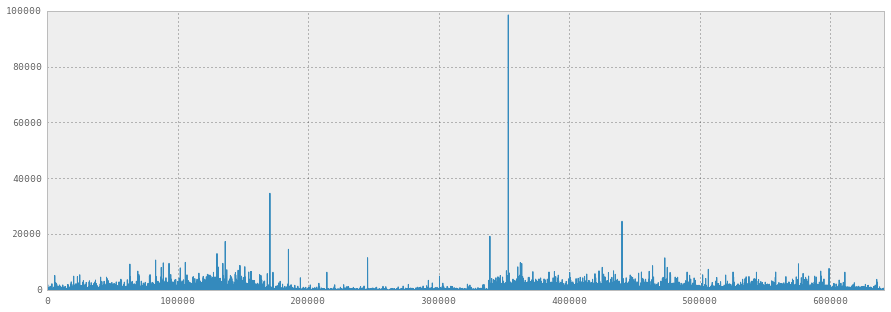

In [20]:
df['nplay_video'].dropna().plot()

In [21]:
df[df['nplay_video']>80000]

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
353229,MITx/6.00x/2012_Fall,MHxPC130155963,1,1,0,0,Other South America,NaN,NaN,NaN,0,2012-08-31,2012-12-19,197757,19,98517,5,0,NaN,NaN


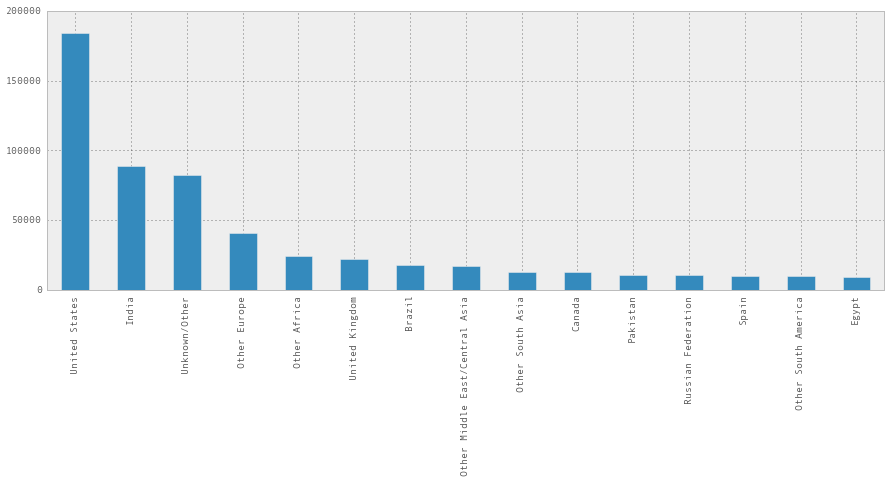

In [22]:
country = df['final_cc_cname_DI'].value_counts()
country[:15].plot(kind = "bar")

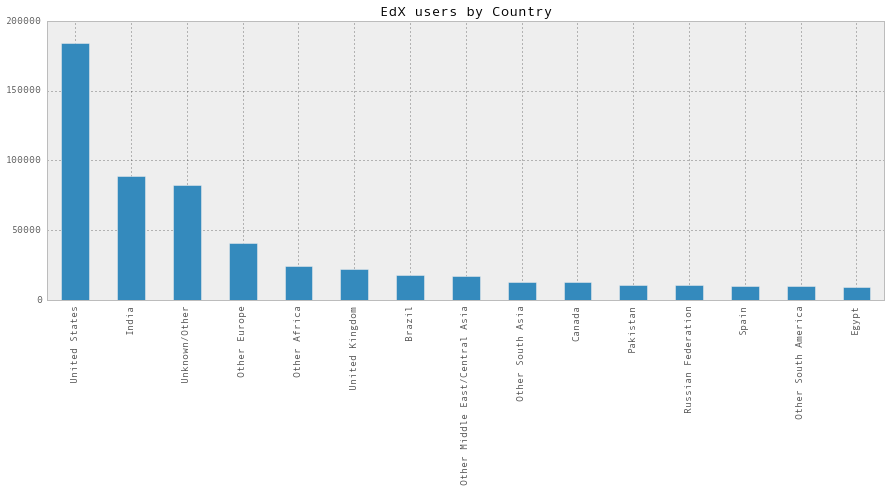

In [23]:
country[:15].plot(kind = "bar",title = "EdX users by Country")

In [27]:
df['final_cc_cname_DI']

0     United States
1     United States
2     United States
3     United States
4     United States
5     United States
6     United States
7            France
8     United States
9     United States
10    United States
11    United States
12    United States
13    United States
14    United States
...
641123            Spain
641124            India
641125    United States
641126    United States
641127            India
641128    United States
641129    Unknown/Other
641130           Canada
641131    Unknown/Other
641132         Pakistan
641133           Canada
641134     Other Europe
641135    United States
641136    United States
641137    United States
Name: final_cc_cname_DI, Length: 641138, dtype: object

In [28]:
df['nplay_video'].max()

98517.0

In [29]:
df['nplay_video'].mean()

114.84417345649427

In [30]:
df['nplay_video'].median()

18.0

In [31]:
##Groupby

In [35]:
df.groupby(by = ["final_cc_cname_DI","gender"])
df

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9,NaN,NaN,0,NaN,1
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaN,NaN,9,NaN,1,0,NaN,1
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16,NaN,NaN,0,NaN,1
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaN,NaN,16,NaN,NaN,0,NaN,1
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaN,NaN,16,NaN,NaN,0,NaN,1
5,HarvardX/PH207x/2012_Fall,MHxPC130275857,1,1,1,0,United States,NaN,NaN,NaN,0,2012-09-17,2013-05-23,502,16,50,12,0,NaN,NaN
6,HarvardX/PH278x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,NaN,NaN,16,NaN,NaN,0,NaN,1
7,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,France,NaN,NaN,NaN,0,2013-01-01,2013-05-14,42,6,NaN,3,0,NaN,NaN
8,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0,2013-02-18,2013-03-17,70,3,NaN,3,0,NaN,NaN
9,HarvardX/CS50x/2012,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-20,NaN,NaN,12,NaN,3,0,NaN,1


In [38]:
df.groupby(by = ["final_cc_cname_DI","gender"]).mean()

registered    viewed  explored  \
final_cc_cname_DI                      gender                                   
Australia                              f                1  0.577156  0.071861   
                                       m                1  0.606525  0.066485   
Bangladesh                             f                1  0.573770  0.065574   
                                       m                1  0.584305  0.041570   
Brazil                                 f                1  0.577759  0.036128   
                                       m                1  0.666721  0.054699   
Canada                                 f                1  0.598749  0.058591   
                                       m                1  0.678538  0.066486   
China                                  f                1  0.592292  0.030426   
                                       m                1  0.666910  0.033892   
Colombia                               f                1  0.623729  0.091525   
                                       m                1  0.708143  0.070906   
Egypt                                  f                1  0.535194  0.041869   
                                       m                1  0.565519  0.042667   
France                                 f                1  0.686141  0.107337   
                                       m                1  0.706518  0.085782   
Germany                                f                1  0.689729  0.106277   
                                       m                1  0.725611  0.098193   
Greece                                 f                1  0.679750  0.085324   
                                       m                1  0.732678  0.100187   
India                                  f                1  0.646058  0.086100   
                                       m                1  0.673045  0.076646   
Indonesia                              f                1  0.555046  0.083486   
                                       m                1  0.617453  0.056604   
Japan                                  f                1  0.665198  0.017621   
                                       m                1  0.727346  0.042071   
Mexico                                 f                1  0.625668  0.068182   
                                       m                1  0.703339  0.058292   
Morocco                                f                1  0.678392  0.050251   
                                       m                1  0.669079  0.032563   
...                                                   ...       ...       ...   
Other North & Central Amer., Caribbean f                1  0.595960  0.077441   
                                       m                1  0.716568  0.065750   
Other Oceania                          f                1  0.380952  0.023810   
                                       m                1  0.774834  0.072848   
Other South America                    f                1  0.606322  0.079023   
                                       m                1  0.696716  0.056300   
Other South Asia                       f                1  0.613455  0.065091   
                                       m                1  0.659847  0.062413   
Pakistan                               f                1  0.555957  0.046029   
                                       m                1  0.577361  0.039116   
Philippines                            f                1  0.562192  0.030109   
                                       m                1  0.649222  0.048360   
Poland                                 f                1  0.742900  0.088191   
                                       m                1  0.841947  0.145132   
Portugal                               f                1  0.571930  0.112281   
                                       m                1  0.716169  0.102012   
Russian Federation                     f                1  0.606507  0.065684 

## MATH is FUN

In [40]:
toy_df = pd.DataFrame({"a":[10,20,30], "b":[15,25,35]})

In [41]:
toy_df

,a,b
0,10,15
1,20,25
2,30,35


In [47]:
toy_df * 10

,a,b
0,100,150
1,200,250
2,300,350


#elementwise

In [49]:
toy_df.max()

a    30
b    35
dtype: int64

In [55]:
toy_df.max(axis=0) #axis=0 column, axis=1 row

a    30
b    35
dtype: int64

In [58]:
toy_df.mean(axis=1) #axis=0 column, axis=1 row

0    12.5
1    22.5
2    32.5
dtype: float64

In [59]:
df_text_toy = pd.DataFrame({"a":["fred","gene"],"b":{"sam","eva"}})

In [60]:
df_text_toy

,a,b
0,fred,"set([eva, sam])"
1,gene,"set([eva, sam])"
